<div style="text-align: center"> <h1>Lasso & Ridge Regression(Regularized Regression)</h1></div>

# Understand Regularized Regression
> ### Regularized regression is a regression method with an additional constraint designed to deal with a large number of independent variables (a.k.a. predictors). It does so by imposing a larger penalty on unimportant ones, thus shrinking their coefficients towards zero.

### The objective of regularization is to end up with a model:

> That is simple and interpretable.

> That generalizes well beyond the sample of our study.

> Whose coefficients won’t change much if we replicate the study.

## **How regularized regression works**
#### Regularized regression works exactly like ordinary (linear or logistic) regression but with an additional constraint whose objective is to shrink unimportant regression coefficients towards zero.

#### And because these coefficients can either be positive or negative, minimizing the sum of the raw coefficients will not work. Instead, we can use 1 of the following constraints:

#### Either to minimize the sum of the absolute value of the regression coefficients — we call this method L1 regularization (a.k.a. LASSO regression) Or to minimize the sum of the squares of the coefficients — we call this method L2 regularization (a.k.a. Ridge regression) And because of this tiny difference, these 2 methods will end up behaving very differently.

## Difference between L1 and L2 regularization

#### The biggest difference between L1 and L2 regularization is that L1 will shrink some coefficients to exactly zero (practically excluding them from the model), making it behave as a variable selection method.

#### In contrast, because L2 minimizes the sum of the squares of the coefficients, it will affect larger ones much more than it will shrink smaller ones, so coefficients close to zero will barely be shrunk further. Therefore, with L2 regularization, we end up with a model that has a lot of coefficients close to, but not exactly zero.

## So is L1 better than L2 regularization?

#### Not necessarily.

#### LASSO (L1 regularization) is better when we want to select variables from a larger subset, for instance for exploratory analysis or when we want a simple interpretable model. It will also perform better (have a higher prediction accuracy) than ridge regression in situations where a small number of independent variables are good predictors of the outcome and the rest are not that important.

#### Ridge regression (L2 regularization) performs better than LASSO when we have a large number of variables (or even all of them) each contributing a little bit in predicting the outcome.

# Implementation of Lasso and Ridge Regression using a USA Housing Dataset

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning and Metrics Libraries

from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split



In [3]:

# load the Boston housing dataset
cars = pd.read_csv(r"C:\Users\ds12\College\ML-Assignments\Data Sets\MLK\clea.csv")

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

cars.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,Vehicle Size,highway MPG,city mpg,Popularity,Engine Fuel Type_electric,Engine Fuel Type_flex-fuel,Engine Fuel Type_natural gas,Engine Fuel Type_unleaded,Transmission Type_AUTOMATIC,Transmission Type_MANUAL,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Vehicle Style_Hatchback,Vehicle Style_Minivan,Vehicle Style_SUV,Vehicle Style_Sedan,Vehicle Style_Van,Vehicle Style_Wagon,MSRP
0,2011,335.000,6,2,0,26,19,3916,0,0,0,1,0,1,0,1,0,0,0,0,0,0,46135
1,2011,300.000,6,2,0,28,19,3916,0,0,0,1,0,1,0,1,0,0,0,0,0,0,40650
2,2011,300.000,6,2,0,28,20,3916,0,0,0,1,0,1,0,1,0,0,0,0,0,0,36350
3,2011,230.000,6,2,0,28,18,3916,0,0,0,1,0,1,0,1,0,0,0,0,0,0,29450
4,2011,230.000,6,2,0,28,18,3916,0,0,0,1,0,1,0,1,0,0,0,0,0,0,34500


In [5]:
X = cars.drop('MSRP', axis=1)
y = cars[['MSRP']]

In [6]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Creating Grid Search for Lasso Regression

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'max_iter': [100, 1000, 2500, 5000],
    'tol': [0.0001, 0.001, 0.01, 0.1],
    'selection': ['cyclic', 'random']
}

# Create a based model

lasso = Lasso()

# Instantiate the grid search model

grid_search_lasso = GridSearchCV(estimator = lasso, param_grid = param_grid,
                            cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search to the data

grid_search_lasso.fit(X_train, y_train)



# print the best parameters

print(grid_search_lasso.best_params_)
print('R2 Score on Training Set: ',r2_score(y_train,grid_search_lasso.predict(X_train)))
print(grid_search_lasso.best_estimator_)



Fitting 5 folds for each of 224 candidates, totalling 1120 fits
{'alpha': 10, 'max_iter': 100, 'selection': 'random', 'tol': 0.1}
R2 Score on Training Set:  0.5091774213524946
Lasso(alpha=10, max_iter=100, selection='random', tol=0.1)


L1 Regression MSE:  40931.425890719074
L1 Regression R2 score 0.5217000640533507


<Axes: xlabel='MSRP'>

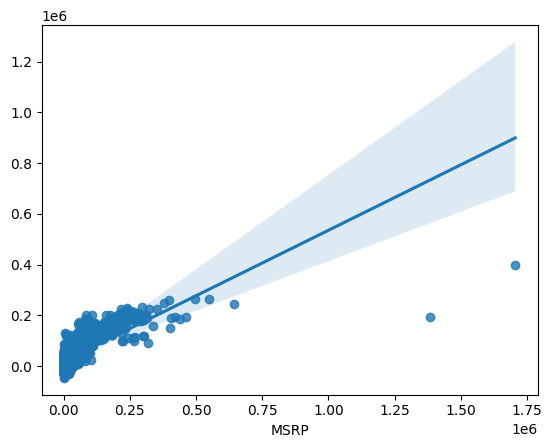

In [9]:
# apply L1 regression
lasso = Lasso(**grid_search_lasso.best_params_)
lasso.fit(X_train, y_train)
lasso_predictions = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)**0.5
print("L1 Regression MSE: ", lasso_mse)
print('L1 Regression R2 score',r2_score(y_test, lasso_predictions))
sns.regplot(x=y_test, y=lasso_predictions, fit_reg=True)

In [10]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based for ridge regression

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'max_iter': [100, 1000, 2500, 5000],
    'tol': [0.0001, 0.001, 0.01, 0.1],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Create a based model

ridge = Ridge()

# Instantiate the grid search model

grid_search_ridge = GridSearchCV(estimator = ridge, param_grid = param_grid,
                            cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data

grid_search_ridge.fit(X_train, y_train)

# print the best parameters

print(grid_search_ridge.best_params_)
print('R2 Score on Training Set: ',r2_score(y_train,grid_search_ridge.predict(X_train)))
print(grid_search_ridge.best_estimator_)

Fitting 3 folds for each of 784 candidates, totalling 2352 fits
{'alpha': 10, 'max_iter': 100, 'solver': 'auto', 'tol': 0.0001}
R2 Score on Training Set:  0.5091328053560318
Ridge(alpha=10, max_iter=100)


L2 Regression MSE:  40938.88087458066
L2 Regression R2 score 0.5215258193040289


<Axes: xlabel='MSRP'>

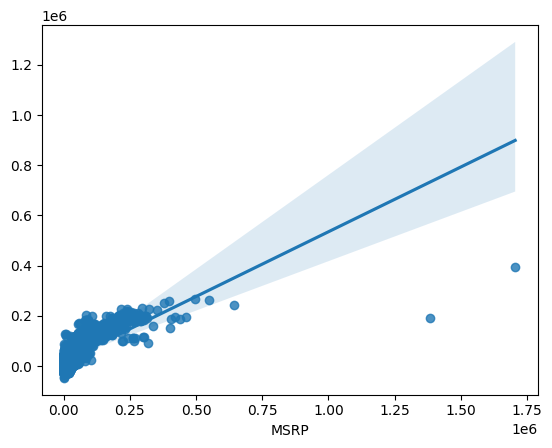

In [11]:


# apply L2 regression
ridge = Ridge(**grid_search_ridge.best_params_)
ridge.fit(X_train, y_train)
ridge_predictions = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)**0.5
print("L2 Regression MSE: ", ridge_mse)
print('L2 Regression R2 score',r2_score(y_test, ridge_predictions))
sns.regplot(x=y_test, y=ridge_predictions,fit_reg=True)